In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [24]:
url='https://raw.githubusercontent.com/krishnaik06/Car-Price-Prediction/master/car%20data.csv'

In [25]:
df=pd.read_csv(url)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
df.shape

(301, 9)

In [27]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
df.drop('Car_Name',axis=1,inplace=True)

In [30]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [33]:
labelencoder=LabelEncoder()

In [37]:
df['Fuel_Type'].unique()

array([2, 1, 0], dtype=int64)

In [44]:
df['Fuel_Type']=labelencoder.fit_transform(df['Fuel_Type'])
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,Manual,0
1,2013,4.75,9.54,43000,1,0,Manual,0
2,2017,7.25,9.85,6900,2,0,Manual,0
3,2011,2.85,4.15,5200,2,0,Manual,0
4,2014,4.60,6.87,42450,1,0,Manual,0


In [45]:
df['Seller_Type'].unique()

array([0, 1])

In [46]:
df['Seller_Type']=labelencoder.fit_transform(df['Seller_Type'])
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,Manual,0
1,2013,4.75,9.54,43000,1,0,Manual,0
2,2017,7.25,9.85,6900,2,0,Manual,0
3,2011,2.85,4.15,5200,2,0,Manual,0
4,2014,4.60,6.87,42450,1,0,Manual,0


In [47]:
df['Transmission']=labelencoder.fit_transform(df['Transmission'])
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [48]:
df['Current_Year']=2020
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,2,0,1,0,2020
1,2013,4.75,9.54,43000,1,0,1,0,2020
2,2017,7.25,9.85,6900,2,0,1,0,2020
3,2011,2.85,4.15,5200,2,0,1,0,2020
4,2014,4.60,6.87,42450,1,0,1,0,2020


In [49]:
df['No_of_Year']=df['Current_Year']-df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Year
0,2014,3.35,5.59,27000,2,0,1,0,2020,6
1,2013,4.75,9.54,43000,1,0,1,0,2020,7
2,2017,7.25,9.85,6900,2,0,1,0,2020,3
3,2011,2.85,4.15,5200,2,0,1,0,2020,9
4,2014,4.60,6.87,42450,1,0,1,0,2020,6


In [51]:
df.drop(['Year','Current_Year'],axis=1,inplace=True)

In [52]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Year
0,3.35,5.59,27000,2,0,1,0,6
1,4.75,9.54,43000,1,0,1,0,7
2,7.25,9.85,6900,2,0,1,0,3
3,2.85,4.15,5200,2,0,1,0,9
4,4.60,6.87,42450,1,0,1,0,6


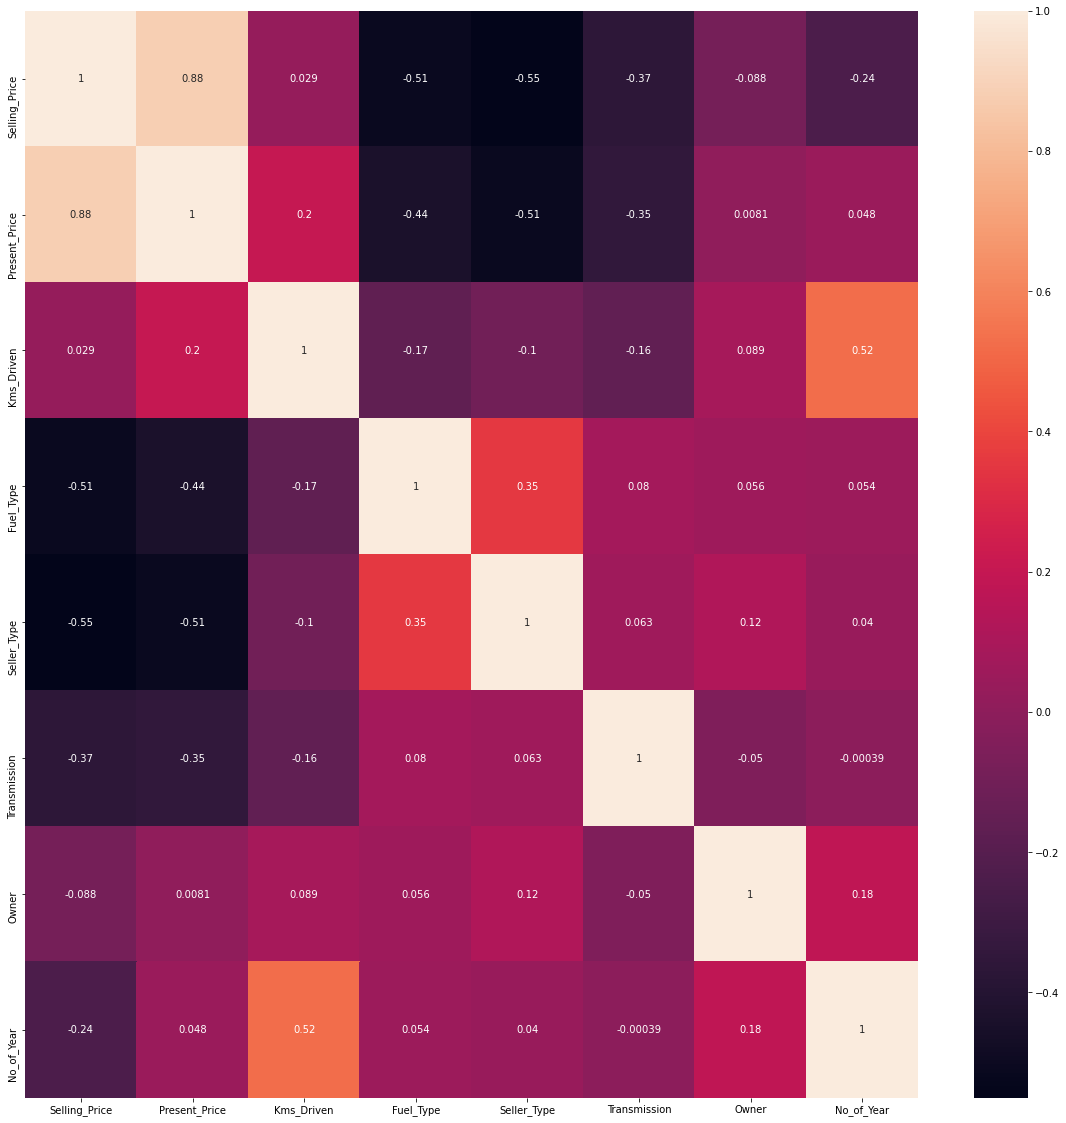

In [57]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

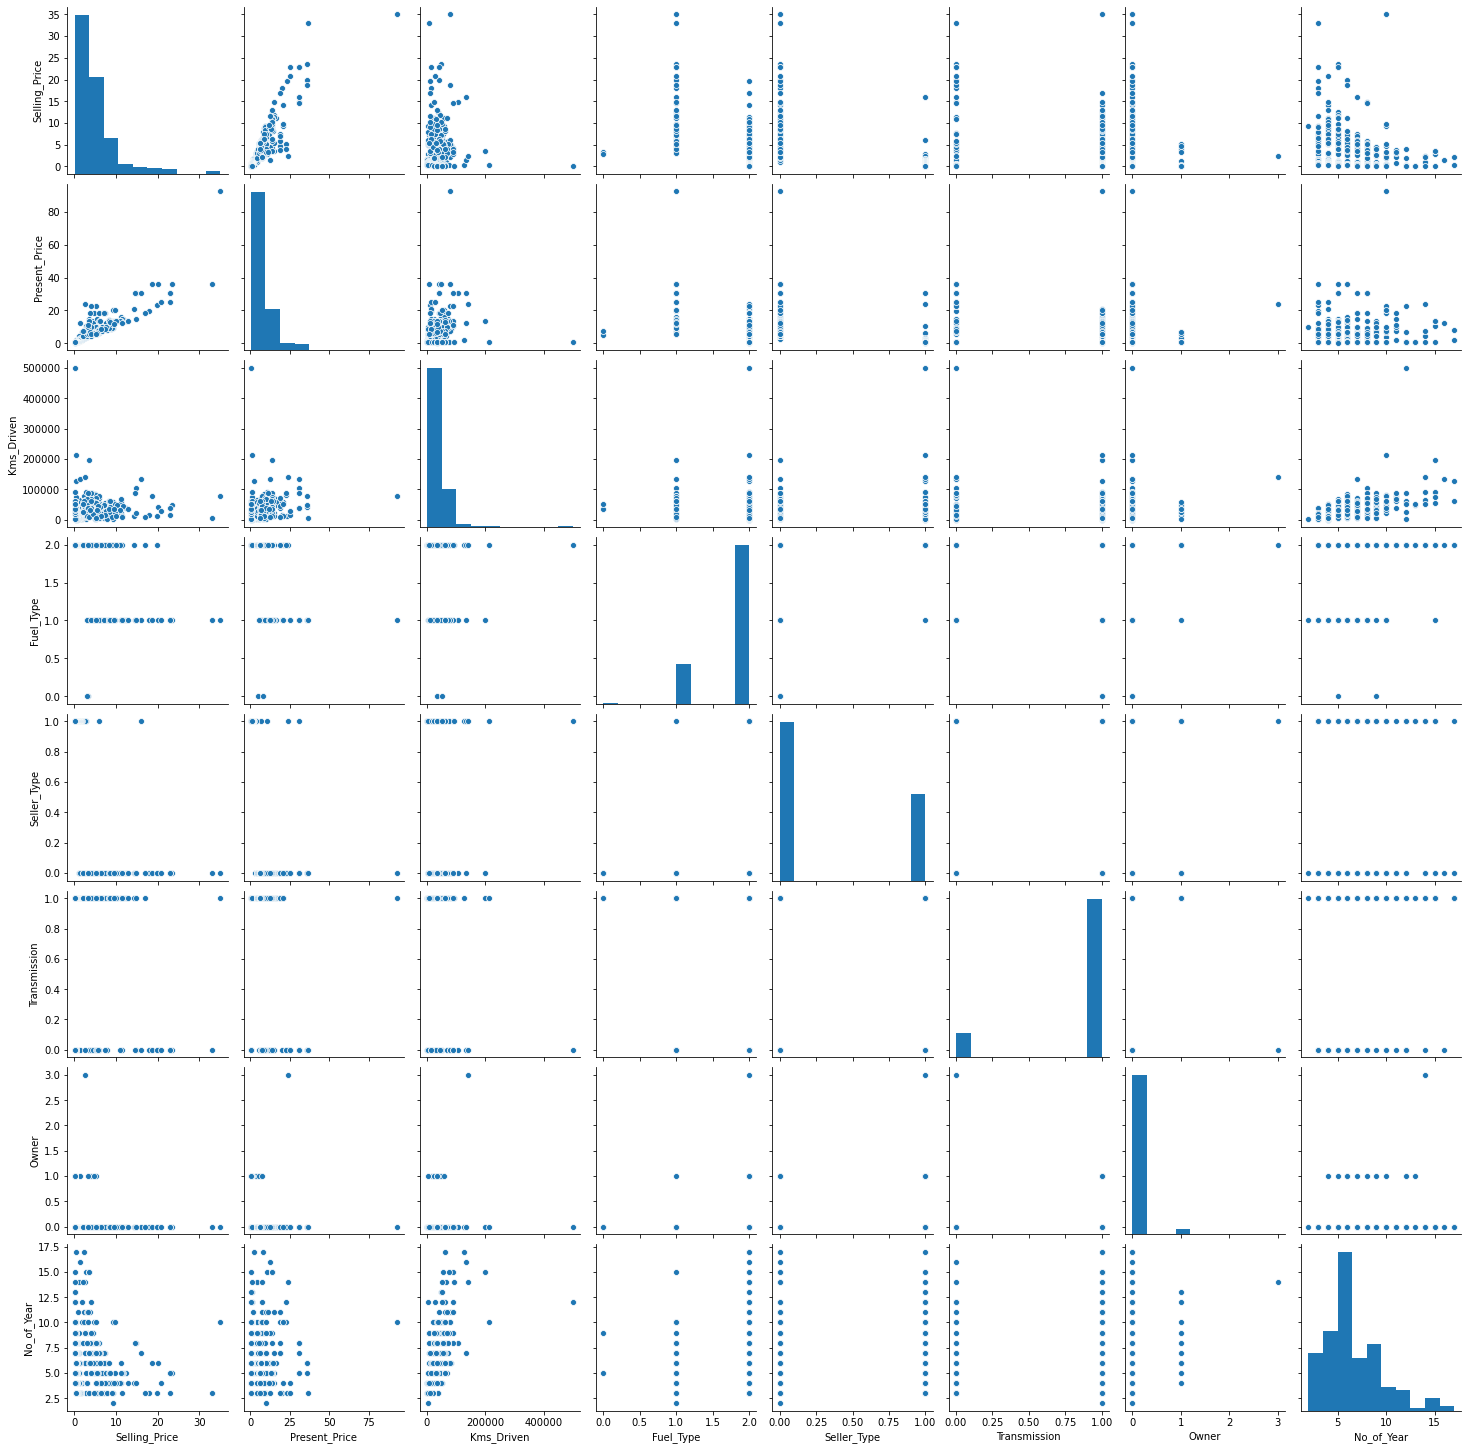

In [54]:
sns.pairplot(df)

In [59]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [77]:
clf=RandomForestRegressor(n_estimators=1000)

In [78]:
clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [82]:
predict=clf.predict(x_test)

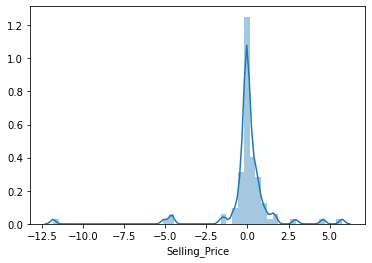

In [80]:
sns.distplot(y_test-predict)

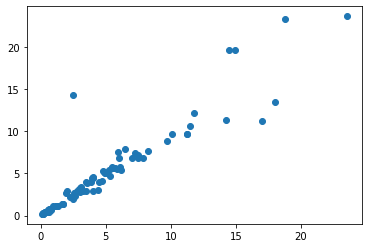

In [83]:
plt.scatter(y_test,predict)